In [1]:
#just making sure the .ini file Poulin sent runs in AxiCLASS
#no MCMC
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [7]:
##This is from AxiCLASS
def is_number(s):
# ---------------------------------- This func checks whether a thing is a number. Found online
    try:
        float(s)
    except ValueError:
        pass

    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass

    return False

#function for ignoring comments in ini files
def ignore_comment(line):
    if '#' in line:
        #save all elements up to the #
        line = line[:line.find('#')]
    if '*' in line:
        line = ''

    return line



##This is from AxiCLASS

def read_ini_file(inifile, loc = ''):

# Function to read ini file and save it in a dictionary that can be passed to classy
# Takes the required argument inifile = filename with extension
# Takes the optional argument loc = location of your ini file, ending in a '/'
# Returns dictionary of everything contained in your ini file
# 
    inivals = {}

    with open(loc + inifile) as f: # opening initialisation file as f
        content = f.readlines() # reading the initialisation file and turning it into a list

    q = {} # initialise q as an empty dictionary
    for s in content: # iterates over lines in .ini file and saves information, turning numbers into floats from strings
        #SV --- added this skip over commented sections
        s = ignore_comment(s)
        if s != '':
            if is_number(s[s.find('=')+2:]):
                q[s[:s.find(' =')]] = float(s[s.find('=')+2:])
            else:
                q[s[:s.find(' =')]] = s[s.find('=')+2:-1]

    q.pop('')
    return q # inivals dict has dict of initial values at key given by 'original'




In [8]:
#get power spectrum from CLASS for a given parameter set
#currently set to TT only
#modified from https://github.com/lesgourg/class_public/wiki/Python-wrapper
def get_power(params):
    
    l_max = 2000 
    
    #create an instance of CLASS wrapper w/correct params
    cosmo = Class()
    cosmo.set(params)
    #cosmo.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    
    cosmo.compute()
    
    #lensed cl until l=l_max
    output = cosmo.lensed_cl(l_max)
    #CHECK THAT THIS IS INDEXED CORRECTLY --- NEED TO CHECK CLASS DOCUMENTATION ON OUTPUT OF LENSED_CL
    ls = output['ell'][2:]
    Cls = output['tt'][2:]
    
    
    #ls = np.arange(l_max+1)
    Dls = ls*(ls+1)*Cls/(2*np.pi)
    
    #clean ups
    cosmo.struct_cleanup()
    cosmo.empty()
    
    return ls, Cls, Dls

In [9]:
input_pars = read_ini_file('example_axiCLASS.ini', loc='/Users/saravannah/Axion-MCMC/axion_MCMC/')

print(input_pars)

{'root': 'output/sara_test', 'output': 'tCl,lCl,mPk', 'P_k_max_h/Mpc': '1', 'write background': 'yes', 'write parameters': 'yeap', 'omega_b': '0.02251', 'omega_cdm': '0.1320', 'H0': '72.81', 'tau_reio': '0.068', 'A_s': '2.191e-9', 'n_s': '0.9860', 'N_ur': '2.0328', 'N_ncdm': '1', 'deg_ncdm': '1', 'm_ncdm': '0.06', 'T_ncdm': '0.71611', 'scf_potential': 'axion', 'n_axion': '2.6', 'log10_axion_ac': '-3.531', 'log10_fraction_axion_ac': '-0.879426', 'scf_parameters': '2.72,0.0', 'scf_evolve_as_fluid': 'no \t', 'scf_evolve_like_axionCAMB': 'no', 'do_shooting': ' yes ', 'do_shooting_scf': 'yes', 'scf_has_perturbations': 'yes', 'attractor_ic_scf': 'no ', 'compute_phase_shift': 'no', 'adptative_stepsize': '1000', 'precision_newton_method_F': '1e-3  ', 'precision_newton_method_x': '1e-3 ', 'modes': 's', 'gauge': 'synchronous', 'lensing': 'yes', 'input_verbose': '0', 'background_verbose': '0', 'thermodynamics_verbose': '0', 'perturbations_verbose': '0', 'transfer_verbose': '0', 'primordial_verbos

In [13]:
#this calculation takes a minute
tt_ls, tt_cls, tt_dls = get_power(input_pars)

[   2    3    4 ... 1998 1999 2000]


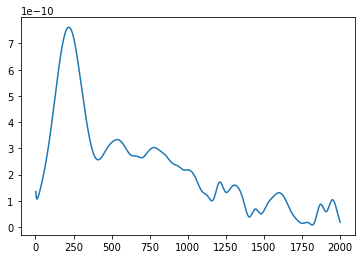

In [12]:
plt.plot(tt_ls, tt_dls, )